In [60]:
#decision tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [130]:
df = pd.read_csv("abalone.csv")

In [54]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [132]:
col_drop=['Shucked weight','Viscera weight','Shell weight']
df = df.drop(col_drop,axis=1)

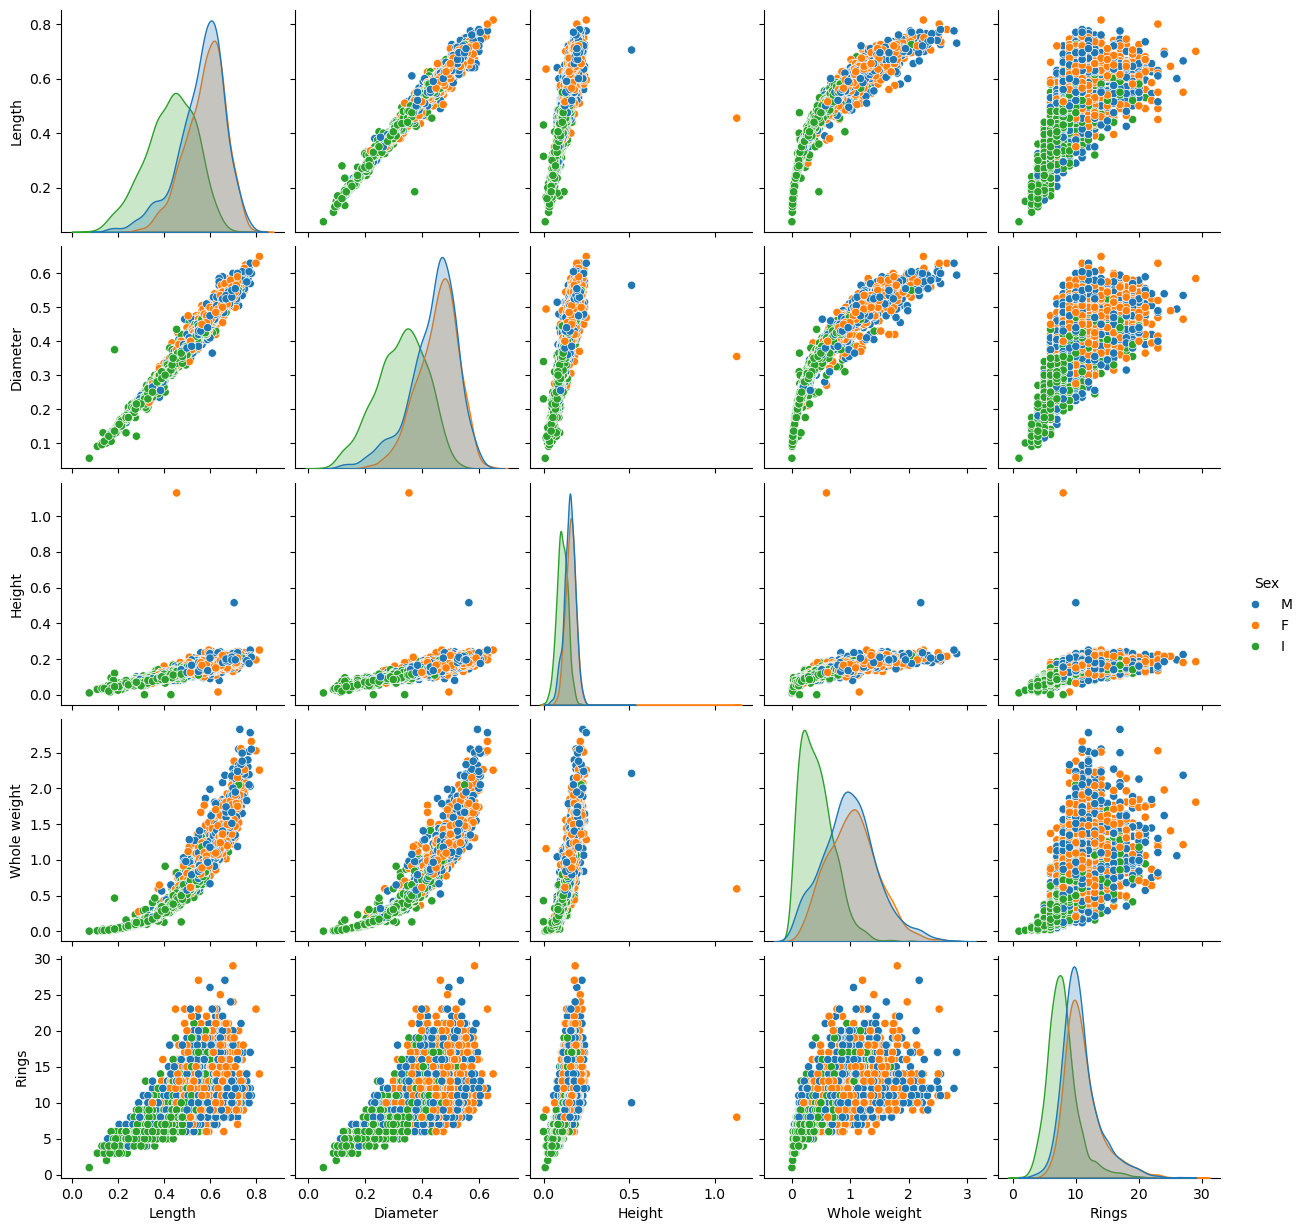

In [31]:
sns.pairplot(df,hue='Sex')

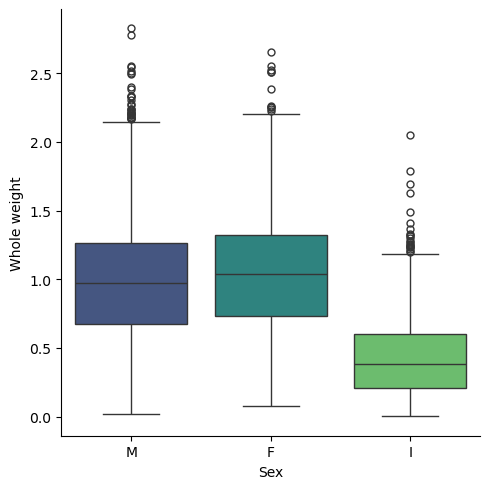

In [41]:
sns.catplot(x='Sex',y='Whole weight',data=df,kind='box',palette='viridis')

In [205]:
X=pd.get_dummies(df,drop_first=False)
y = df['Sex']

In [207]:
dropcols=['Sex_I','Sex_M','Sex_F']
X = X.drop(dropcols,axis=1)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = DecisionTreeClassifier()

In [211]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [213]:
base_pred = model.predict(X_test)

In [215]:
cm = confusion_matrix(y_test, base_pred,normalize='true')

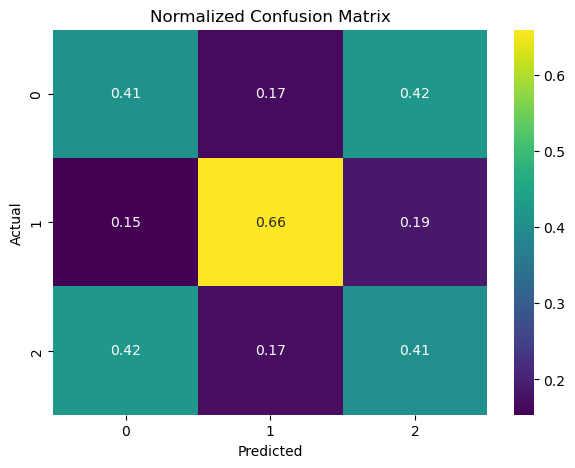

In [217]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [219]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           F       0.36      0.41      0.38       357
           I       0.66      0.66      0.66       423
           M       0.45      0.41      0.43       474

    accuracy                           0.49      1254
   macro avg       0.49      0.49      0.49      1254
weighted avg       0.50      0.49      0.49      1254



In [221]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Length,0.170765
Diameter,0.131938
Height,0.131660
Whole weight,0.417378
Rings,0.148259


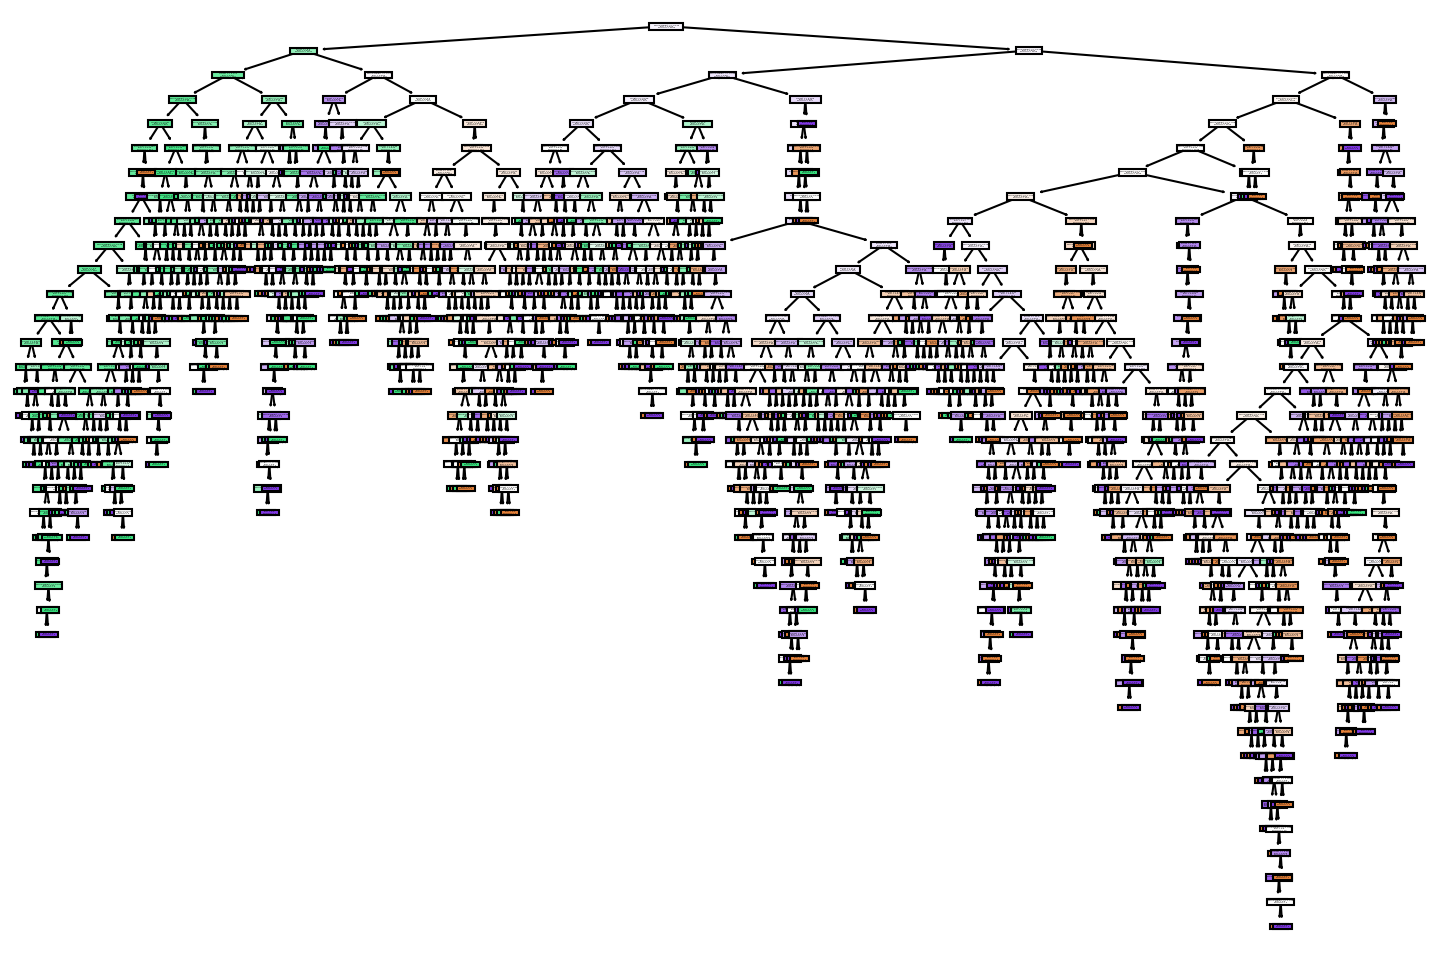

In [223]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

In [229]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

           F       0.44      0.55      0.49       357
           I       0.67      0.75      0.71       423
           M       0.44      0.31      0.36       474

    accuracy                           0.53      1254
   macro avg       0.52      0.54      0.52      1254
weighted avg       0.52      0.53      0.51      1254





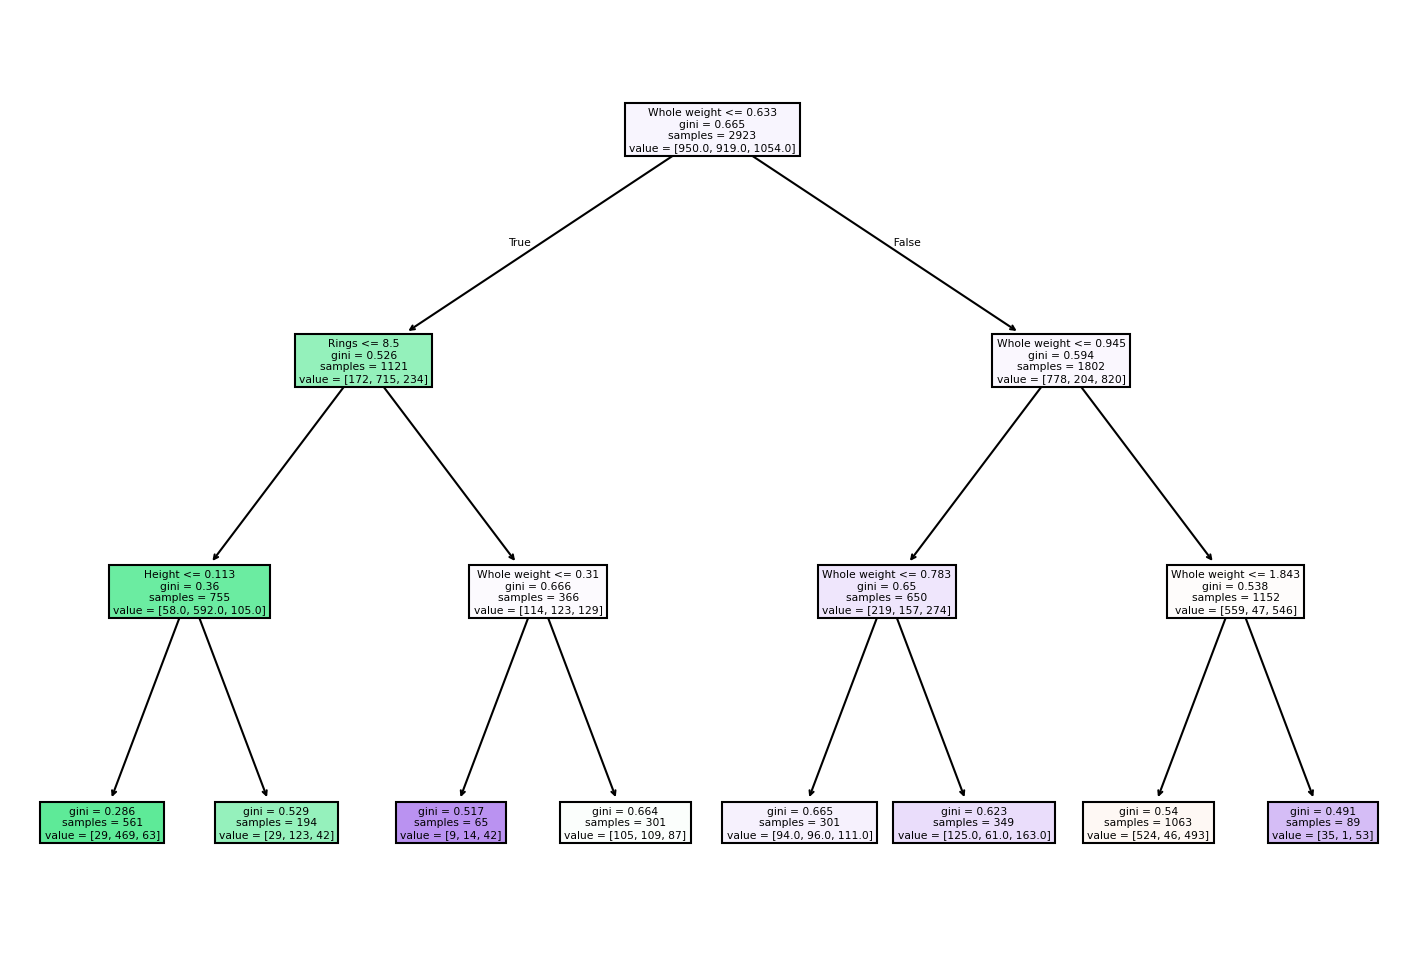

In [231]:
report_model(pruned_tree)

In [233]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

              precision    recall  f1-score   support

           F       0.43      0.58      0.49       357
           I       0.67      0.75      0.71       423
           M       0.41      0.26      0.32       474

    accuracy                           0.52      1254
   macro avg       0.50      0.53      0.51      1254
weighted avg       0.50      0.52      0.50      1254





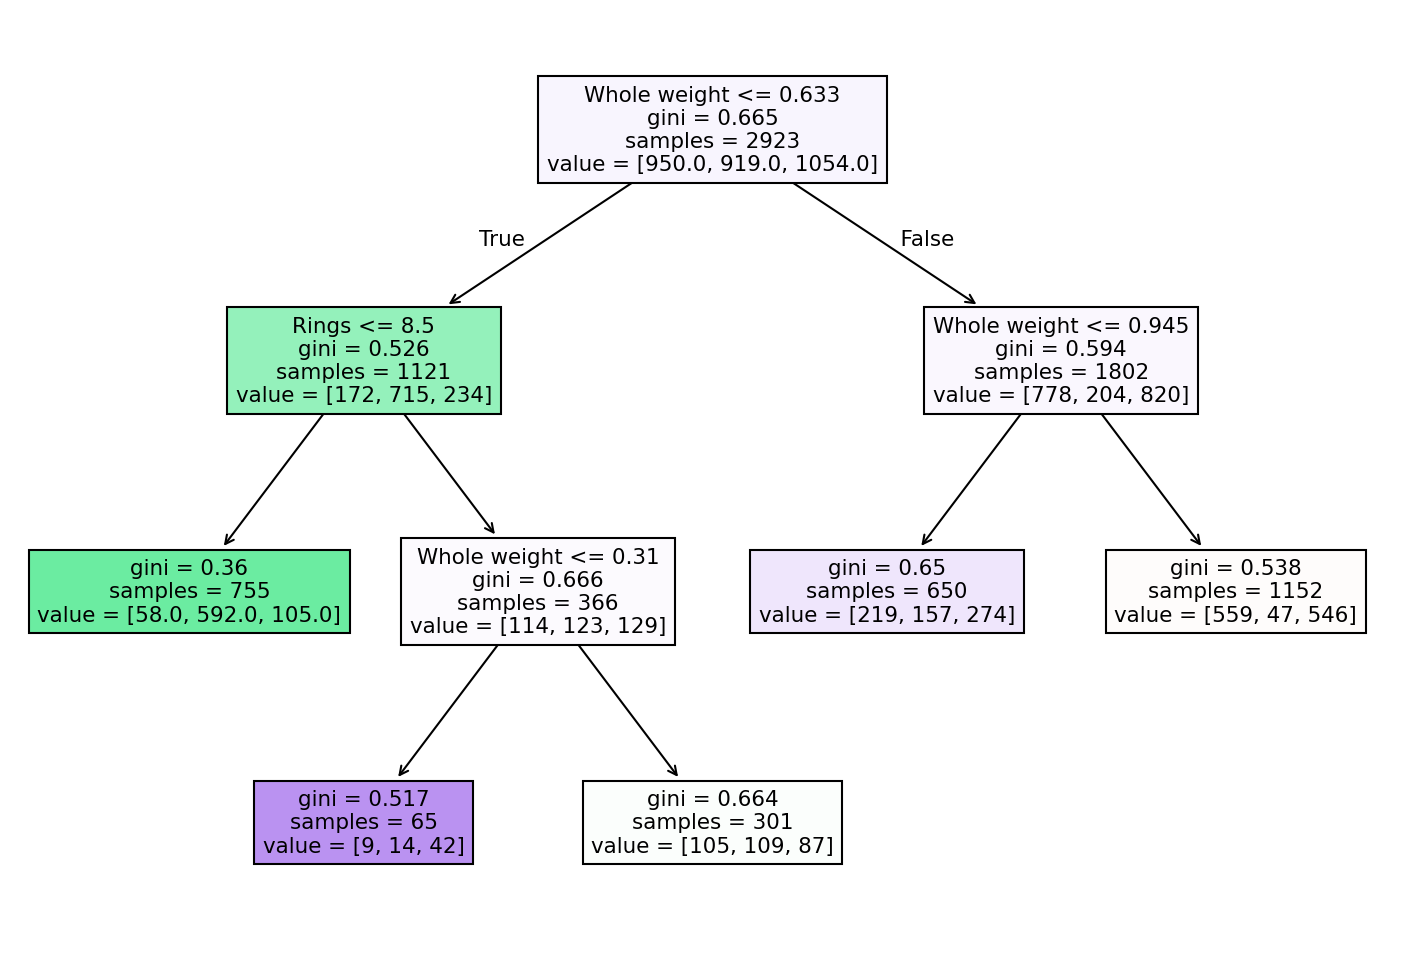

In [235]:
report_model(pruned_tree)

In [245]:
entropy_tree = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=4,max_depth=5)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=4)

              precision    recall  f1-score   support

           F       0.43      0.54      0.48       357
           I       0.76      0.65      0.70       423
           M       0.39      0.37      0.38       474

    accuracy                           0.51      1254
   macro avg       0.53      0.52      0.52      1254
weighted avg       0.53      0.51      0.52      1254





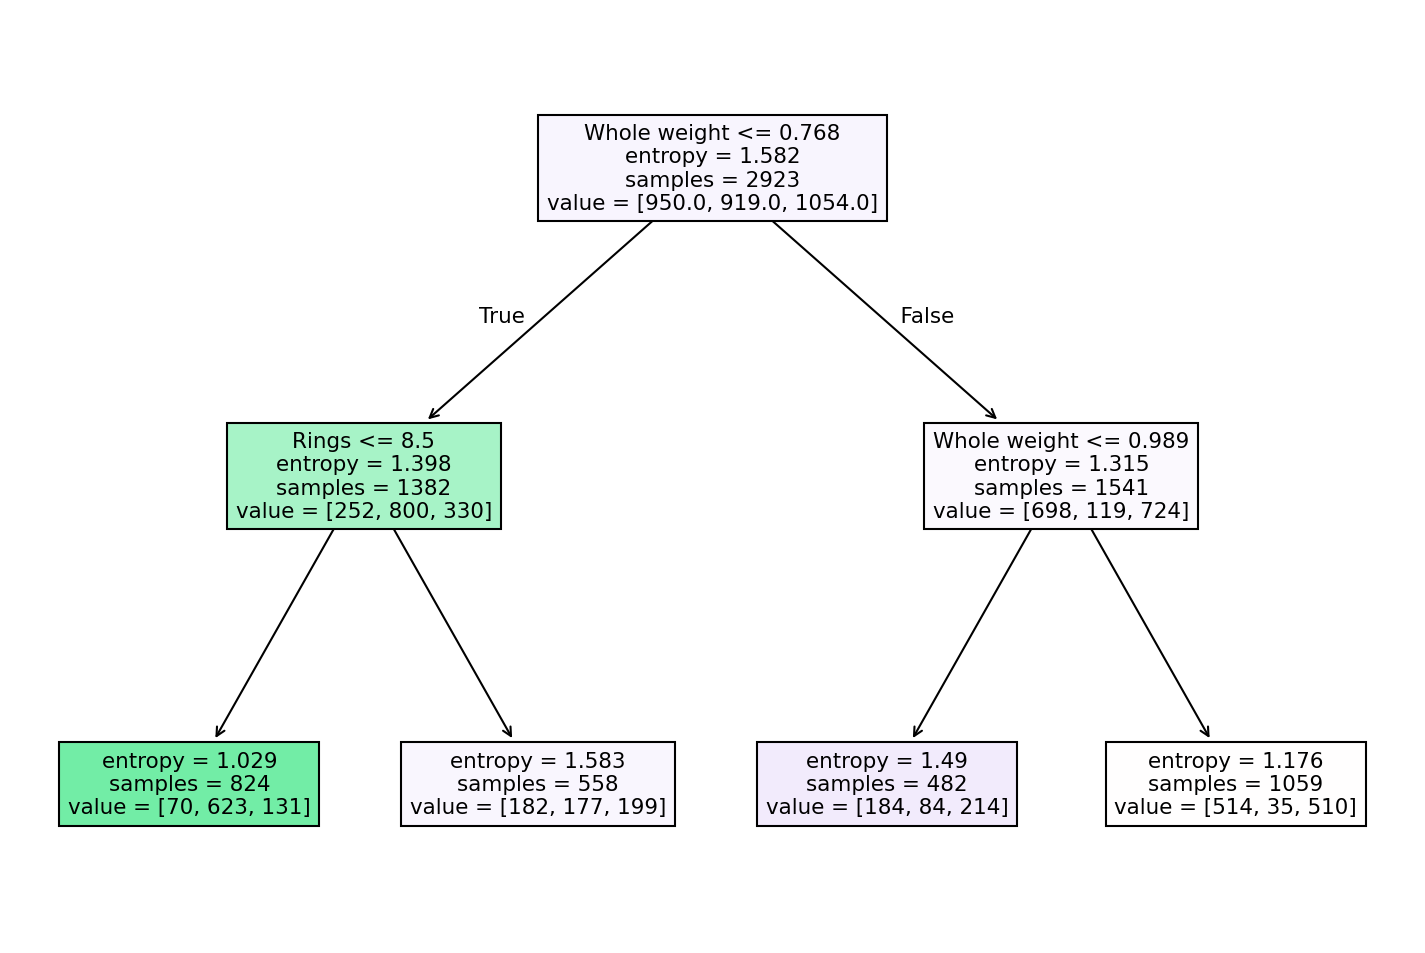

In [247]:
report_model(entropy_tree)

Feature Importances:
 Whole weight    0.417378
Length          0.170765
Rings           0.148259
Diameter        0.131938
Height          0.131660
dtype: float64


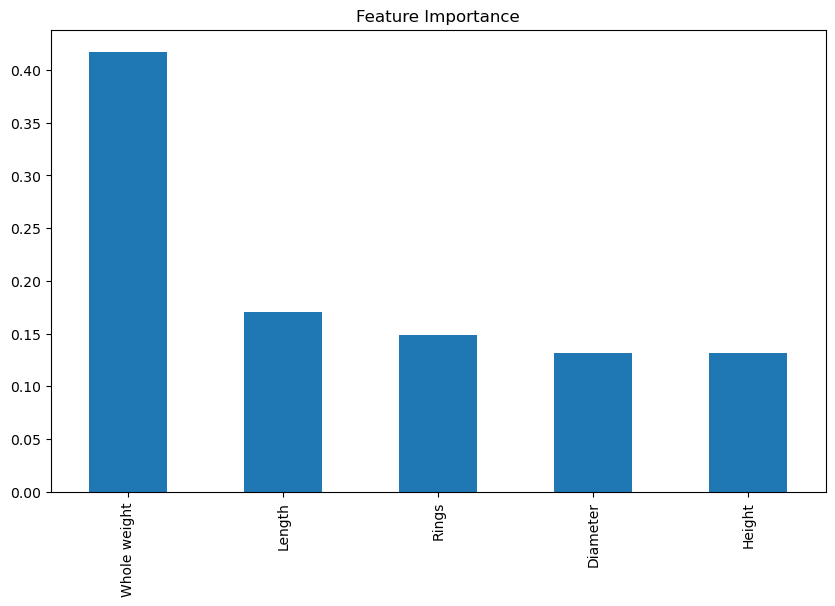

In [250]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

In [165]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);